Objectives
---
학습 목표
1. **데이터를 배열로 저장하는 것**에 대해 이해하고 **list, numpy의 사용법**을 학습합니다.
2. **구조화된 데이터를 저장하는 것**을 이해하고 **dictonary와 pandas 사용법**을 학습합니다.
3. **이미지 데이터를 numpy 배열로 저장하는 것을 이해하고 그 사용법**을 학습합니다.
4. 학습한 자료 구조를 활용해서 **통계 데이터를 어떻게 계산**하는지 학습합니다.

---

## 목차

배열은 가까이에~ 기본 통계 데이터를 계산해 볼까?
1. 평균 계산하기 ✔️
2. 배열을 활용한 평균, 표준편차, 중앙값 계산
끝판왕 등장! numpy로 이 모든걸 한방에!
1. NumPy 소개
2. 주요기능
3. NumPy로 기본 통계 데이터 계산 해보기
데이터의 행렬 변환
1. 이미지 데이터의 행렬 변환
구조화된 데이터란?
1. 간단한 dictionary를 활용한 판타지 게임 logic 설계
2. 구조화된 데이터와 pandas
3. Pandas와 함께 EDA 시작하기

## 평균 계산하기

첫번째, 평균 숫자들의 합은 total, 숫자는 count로 지정해보자.
변수명을 우선 정하고 0으로 초기값을 할당(assign)하자.

두번째, input()을 할당해서 입력값이 있도록 만들자. 입력이 없으면 종료키로 하자.

세번째, while 반복문을 설정하고 입력값이 할당 안 되면 종료되게 하기로 하였으니 input 함수에서 받은 값이 무엇이 되던간에 이것이 false가 나오면 반복문을 빠져나오게 하자.

넷, While 조건문이 True라면, count와 total이 갱신된다. 반복문이 실행될때마다 +1이므로 증강연산자를 사용하고 total에는 input으로 받은 숫자를 더해준다. input함수가 return하는 값의 자료형은 str, float이므로 이거 잊지말자!

다섯, 혹시라도 사용자가 숫자가 아닌 엉뚱한 문자열을 입력하면 어떻게 할까요? 사용자로부터 무엇인가를 입력받을 때는 예외처리를 해주자.

In [ ]:
total = 0                                                     # 숫자들의 합
count = 0                                                     # 숫자
numbers = input("Enter a number :  (<Enter Key> to quit)")    # 출력될 숫자들
while numbers != "":                                          # 무언가가 입력되면
    try:
        x = float(numbers)                                    # 실수로 표현하라
        count += 1                                            # 숫자들의 갯수 증강연산자
        total = total + x                                     
    except ValueError:                                        # 입력에 오류가 있다면
        print('NOT a number! Ignored..')                      # 에러문을 출력
    numbers = input("Enter a number :  (<Enter Key> to quit)")
avg = total / count                                           # 중앙값
print("\n average is", avg)

평균 계산을 위해 숫자 여러 개를 입력으로 받지만, 굳이 이 여러 개의 숫자를 배열(array)로 저장하진 않았습니다.

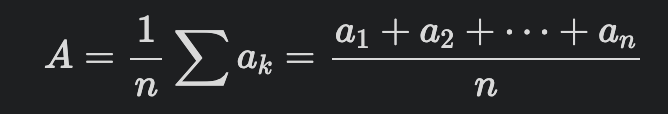

시그마는 합의 기호입니다. 즉, 어떤 숫자의 배열이 있을 때 그 안의 원소를 모두 더하는 연산을 한다고 해 볼게요. 그럼 더하기 식을 하나하나 기호(+) 를 써서 표현하는것보다는 합의 기호 시그마로 나타내면 더 간편하게 표현할 수 있겠죠?

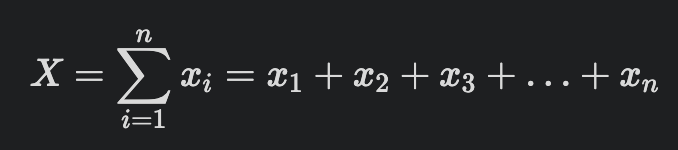

평균을 나타내는 수식에서 볼 수 있듯, 평균을 구하기 위해서는 숫자들의 총합이 필요할 뿐, 이 숫자들을 굳이 배열 등의 변수로 저장하지 않아도 됩니다. 그래서 코드에서 우리는 숫자들의 총합을 total이라는 변수에 계속 할당하고 그 시점까지의 총합만을 기억해 두었어요.

어때요. 반복문에 의해서 아래 처럼 숫자 입력, 합산이 반복 시행되는 것을 알 수 있겠죠?

In [ ]:
total = 0.0
number = float(input("enter the number: "))
total = total + number
number = float(input("enter the number: "))
total = total + number
...

프로그램을 좀 확장해 보겠습니다. 이번에는 평균도 구하고 표준편차와 중앙값도 계산하는 겁니다.

---

<ins>1) 배열의 의미<ins>

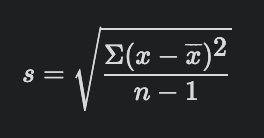

윗 수식은 표준편차를 구하는 공식입니다.

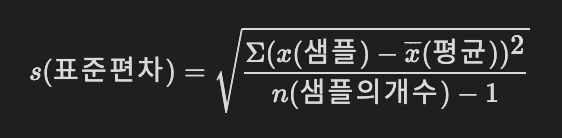

각각의 기호가 의미하는 바를 (괄호) 안에 적었습니다.

여기서 '샘플'은 '입력받은 숫자들'을 의미합니다. '샘플의 개수'라는 것은 '입력받은 숫자의 개수'가 되겠네요. (왜 샘플의 개수에 1을 빼서 나누는 걸까요? 이 수식은 표본(sample) 표준편차를 구하는 것입니다. 모집단(population) 표준편차와 이점에서 다르니 개념상 차이가 궁금하신 분은 [링크](https://hsm-edu.tistory.com/13)를 참고해 주세요.)

표준편차 수식을 보니 입력된 샘플에서 평균을 뺀 값이 필요합니다. 이제는 입력받은 모든 숫자들을 저장해둘 필요가 생겼습니다.

각각의 숫자에 해당하는 변수를 생성해서 저장할 수도 있지만, 지금은 입력받은 숫자가 몇 개인지 모르는 상황이므로 변수를 미리 생성하는 것은 불가능합니다. 변수를 몇개 생성해야 하는지도 모르니까요. 이럴 때는 데이터 값 전체를 하나의 객체에 순서대로 모아 놓을 수 있어야 사용하기 편리할 거에요. 다음과 같이요.

In [ ]:
X = [x1, x2, x3,....xn] 

파이썬은 이런 기능을 가진 리스트(list)라는 자료구조를 기본적으로 제공합니다. 우리는 리스트가 순서를 가진 요소(element)의 배열이란 것을 알고 있습니다. x1, x2, x3,…xn을 통째로 X라는 변수에 순서대로 저장하는 것입니다.

---

## 2) 사용자가 입력한 숫자들을 배열로 만들기

이번에는 사용자의 입력으로 받은 숫자를 배열로 표현해 보겠습니다.     
배열을 표현하기 위해서 파이썬의 기본 컨테이너 자료형인 리스트(list)를 사용하겠습니다.

In [ ]:
# 2개 이상의 숫자를 입력받아 리스트에 저장하는 함수
def numbers():
    X=[]    # X에 빈 리스트를 할당합니다.
    while True:
        number = input("Enter a number (<Enter key> to quit)") 
        while number !="":
            try:
                x = float(number)
                X.append(x)    # float형으로 변환한 숫자 입력을 리스트에 추가합니다.
            except ValueError:
                print('>>> NOT a number! Ignored..')
            number = input("Enter a number (<Enter key> to quit)")
        if len(X) > 1:  # 저장된 숫자가 2개 이상일 때만 리턴합니다.
            return X

X=numbers()

print('X :', X)

변수 X에 빈 리스트([])를 할당하여 초기화한 후 리스트의 append 메소드를 이용해 계속 원소를 추가하며 구현했네요.

다른 언어에서는 배열은 크기를 정해 놓아야 하는 경우가 많습니다. 대표적으로 C언어가 그러하지요. 그러니깐, 배열 변수를 만들 때 처음에 원소가 몇 개 들어갈 수 있다고 정해놓아야 합니다. 그러나 파이썬의 리스트는 그렇지 않습니다. 파이썬의 리스트는 임의의 데이터 타입을 담을 수 있는 가변적 연속열(Sequence)형입니다. 즉, 파이썬 리스트는 동적 배열(Dynamic Array)입니다.

---
**여기서 잠깐, 알아두면 도움이 되는 개념정리**
본문에서 지금까지는 연속열(Sequence)형 데이터의 자료구조를 배열(Array)로 지칭해 왔습니다. 하지만 엄밀하게 개념을 구분하자면, 선형적 데이터를 다루는 자료구조인 list와 array는 서로 다릅니다. 어떤 차이가 있는지는 [여기](https://blog.martinwork.co.kr/theory/2018/09/22/what-is-difference-between-list-and-array.html)를 참고합시다.

In [ ]:
import array as arr

mylist = [1, 2, 3]   # 이것은 파이썬 built-in list입니다. 
print(type(mylist))

mylist.append('4')  # mylist의 끝에 character '4'를 추가합니다. 
print(mylist)

mylist.insert(1, 5)  # mylist의 두번째 자리에 5를 끼워넣습니다.
print(mylist)

myarray = arr.array('i', [1, 2, 3])   # 이것은 array입니다. import array를 해야 쓸 수 있습니다.
print(type(myarray))

# 아래 라인의 주석을 풀고 실행하면 에러가 납니다.
#myarray.append('4')    # myarray의 끝에 character '4'를 추가합니다. 
print(myarray)

myarray.insert(1, 5)    # myarray의 두번째 자리에 5를 끼워넣습니다.
print(myarray)

In [ ]:
## output

<class 'list'>
[1, 2, 3, '4']
[1, 5, 2, 3, '4']
<class 'array.array'>
array('i', [1, 2, 3])
array('i', [1, 5, 2, 3])

위 코드는 파이썬에서 built-in 으로 제공하는 list가 array와 다른 점을 몇가지 보여 줍니다.

- list는 별도의 import가 필요없지만 array를 사용하기 위해서는 import를 해주어야 합니다. 파이썬에서 array는 built-in이 아닙니다.
- list 안의 element 사이에 다른 타입의 자료형이 허용됩니다. 숫자로만 이루어진 list에 문자열 element를 추가할 수 있습니다. 그러나 array는 처음부터 element의 유형을 지정해서 생성하며, 지정되지 않은 다른 타입의 element 추가가 허용되지 않습니다. 이러한 array의 특성은 다음에 나오는 NumPy에도 동일하게 적용됩니다.

array는 element들이 연속된 메모리 공간에 배치되며, 모든 element들의 동일한 크기와 타입을 가져야 합니다. 그러므로 위에서 myarray.append('4')는 허용되지 않습니다. 그렇다면 파이썬 built-in 리스트는 array가 아닌 것 같습니다. 중간에 element를 insert할 수 있는 것도 array보다는 list 자료구조의 특성입니다. 그래서 파이썬의 리스트는 좀 묘합니다. 자료구조상 linked list의 기능을 모두 가지고 있지만 실제로는 array로 구현되어 있다고 합니다. linked list와 다르게 파이썬 리스트는 element들이 연속된 메모리 공간에 배치되도록 구현되어 있기 때문입니다. 그렇게 보면 파이썬의 리스트는 list와 array의 장점을 모두 취한 형태라고 볼 수 있겠습니다.

---

## 3) 리스트를 활용한 시그마의 표현

다시 아까 입력받은 숫자 배열로 돌아가 봅시다. 지난 스텝에서 다룬 시그마는 입력으로 받은 숫자의 합을 계속 total이라는 변수에 할당하였죠? 이제 배열이 있으니, 배열을 이용해서 시그마를 표현해 보고자 합니다. 시그마를 배열을 통해 계산하려면 for문을 사용해야 합니다. 리스트는 원소의 값과 순서를 알고 있으니까요.

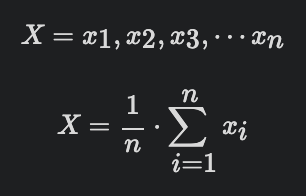

코드로 구현하면 아래와 같습니다.

In [2]:
total = 0.0
for i in range(len(X)):
    total = total + X[i]
mean = total / len(X)

print('sum of X: ', total)

NameError: name 'X' is not defined

위에서는 파이썬에서 연속된 수를 리스트로 만들어주는 range()와 리스트의 길이, 즉 리스트에 포함된 원소의 개수를 구할 수 있는 len() 함수를 사용했습니다.

---

## 4) 중앙값

중앙값(median)은 주어진 숫자를 크기 순서대로 배치할 때 가장 중앙에 위치하는 숫자입니다.

중앙이라는 위치는 그 숫자의 총합이 홀수이냐 짝수이냐에 따라 달라집니다. 예를 들어,

만약 숫자가 1, 3, 3, 6, 7, 8, 9 라면, 중앙값은 6입니다.
만약 숫자가 1, 3, 3, 7, 8, 9 라면, 중앙값은 (3 + 7) / 2 = 5입니다.
즉, 위의 예시를 일반화 해보면 다음과 같습니다. 총 개수 n인 숫자를 순서대로 배열했을 때,

n이 홀수이면 n/2을 반올림한 순서의 값이 중앙값입니다.
위에서는 7/2 = 3.5 의 반올림이니까 4번째 숫자의 값입니다.
n이 짝수라면 n/2번째 값과 ((n/2) + 1) 번째 값의 평균이 됩니다.
위에서는 6/2 = 3, ((6/2) + 1) = 4 이므로 3번째 값과 4번째 값의 평균이 중앙값입니다.
중앙값을 코드로 구현해 볼게요.

In [3]:
def median(nums):       # nums : 리스트를 지정하는 매개변수
    nums.sort()                 # sort()로 리스트를 순서대로 정렬
    size = len(nums)
    p = size // 2
    if size % 2 == 0:          # 리스트의 개수가 짝수일때 
        pr = p   
        pl = p-1
        mid= float((nums[pl]+nums[pr])/2)    
    else:                               # 리스트의 개수가 홀수일때
        mid = nums[p]
    return mid

print('X :', X)
median(X)                       # 매개변수의 값으로 X를 사용함

NameError: name 'X' is not defined

## 5) 표준편차와 평균

In [5]:
def means(nums):
    total = 0.0
    for i in range(len(nums)):
        total = total + nums[i]
    return total / len(nums)

means(X)

NameError: name 'X' is not defined

In [8]:
avg = means(X)

def std_dev(nums, avg):
   texp = 0.0
   for i in range(len(nums)):
       texp = texp + (nums[i] - avg)**2    # 각 숫자와 평균값의 차이의 제곱을 계속 더한 후
   return (texp/(len(nums)-1)) ** 0.5    # 그 총합을 숫자개수-1로 나눈 값의 제곱근을 리턴합니다.

std_dev(X,avg)

NameError: name 'X' is not defined

우선 매개변수로 숫자의 배열과 **평균값**을 받습니다.    

각 숫자와 평균값의 차이를 구한 뒤 제곱하고, for문을 이용해 그 총합을 더합니다.    

그리고 구한 총합을 (숫자의 개수-1)로 나누고, 그 **제곱근을 계산해 표준편차**를 구합니다.    

## 6) 전체 코드: main() 함수

위에 구현한 코드를 순서대로 사용해 보겠습니다.

- 우리가 구현하고자 하는 값은 사용자가 입력한 숫자들에 대한 평균값, 중앙값, 표준편차입니다.
- 우선 사용자가 입력한 숫자를 배열(리스트)로 만듭니다.
- 각 숫자의 평균값과 중앙값을 구합니다.
- 각 숫자의 표준편차를 구합니다.    
     
각 함수들은 다 구현했죠? main함수로 구현해 보면 다음과 같습니다.

In [9]:
med = median(X)
avg = means(X)
std = std_dev(X, avg)
print("당신이 입력한 숫자{}의 ".format(X))
print("중앙값은{}, 평균은{}, 표준편차는{}입니다.".format(med, avg, std))

NameError: name 'X' is not defined

전체코드는 다음과 같습니다.

In [ ]:
def numbers():
    X=[]
    while True:
        number = input("Enter a number (<Enter key> to quit)") 
        while number !="":
            try:
                x = float(number)
                X.append(x)
            except ValueError:
                print('>>> NOT a number! Ignored..')
            number = input("Enter a number (<Enter key> to quit)")
        if len(X) > 1:
            return X

def median(nums): 
    nums.sort()
    size = len(nums)
    p = size // 2
    if size % 2 == 0:
        pr = p
        pl = p-1
        mid = float((nums[pl]+nums[pr])/2)
    else:
        mid = nums[p]
    return mid

def means(nums):
    total = 0.0
    for i in range(len(nums)):
        total = total + nums[i]
    return total / len(nums)

def std_dev(nums, avg):
   texp = 0.0
   for i in range(len(nums)):
       texp = texp + (nums[i] - avg) ** 2
   return (texp/(len(nums)-1)) ** 0.5

def main():
    X = numbers()
    med = median(X)
    avg = means(X)
    std = std_dev(X, avg)
    print("당신이 입력한 숫자{}의 ".format(X))
    print("중앙값은{}, 평균은{}, 표준편차는{}입니다.".format(med, avg, std))

if __name__ == '__main__':
    main()

## 6-4. 끝판왕 등장! numpy로 이 모든걸 한방에! (1) NumPy 소개

__NumPy__는 **numerical python**의 줄임말로 **고성능의 과학계산에 컴퓨팅과 데이터 분석**에 필요한 **파이썬 패키지** 입니다.

파이썬 기본 패키지 관리자인 pip안에는 NumPy가 없으므로 새로 설치를 하셔야 해요.
conda를 사용하신다면 기본적으로 포함되어있기도 하지만 그렇지 않은 경우도 있으니 conda list | grep numpy로 설치 여부를 먼저 확인해 주세요!

설치 명령어는 다음과 같습니다.



In [ ]:
pip install numpy 

잠깐 파이썬 패키지 관리자에 대해 설명하자면,
**pip**은 **package installer for python**의 약자로 **파이썬 전용 패키지 설치 소프트웨어** 입니다.     

파이썬을 설치하면 자동으로 설치되요.
혹시 패키지, 모듈, 라이브러리가 헷갈리시나요? 그럼 아래 블로그에 나온 나온 개념 정도만 숙지하시면 됩니다.

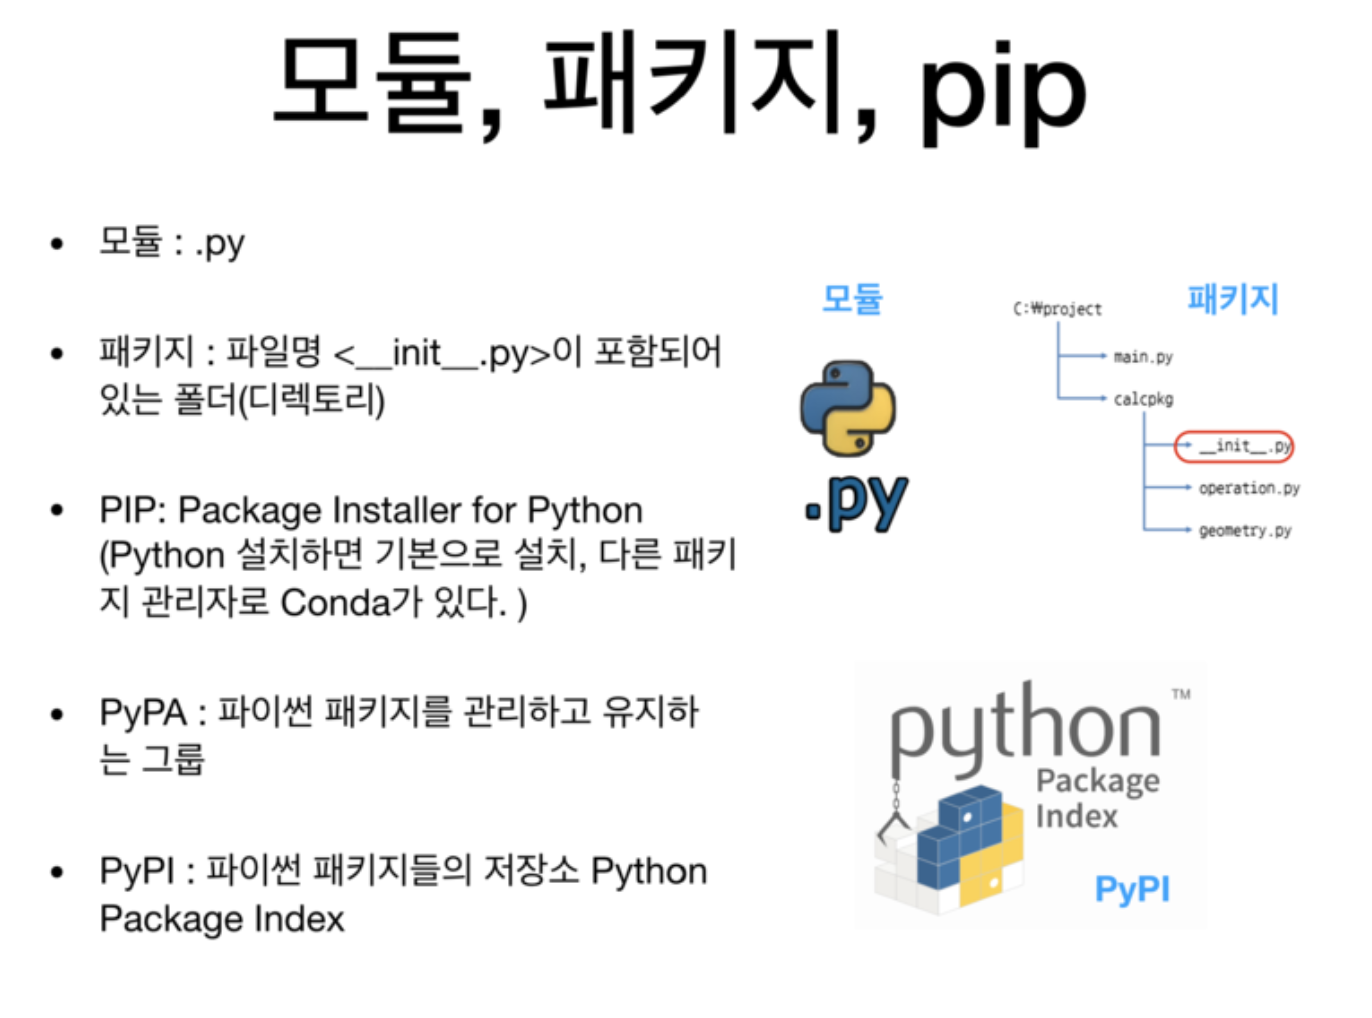

> **모듈**이라는 것은 컴퓨터가 실행할 수 있는 코드를 지닌 파일이다. 즉, 모듈(module)은 파이썬 코드의 파일이다.     
*노드 형식은 from 모듈 import 함수

> **패키지**라는 것은 도트(.)를 이용하여 파이썬 모듈을 계층적 (디렉터리 구조)로 관리할 수 있게 도와준다.    
파이썬 애플리케이션을 좀 더 확장 가능하게 모듈이라는 파일 계층구조에 구성할 수 있다.     
*참고로 package 폴더안에 ___init___.py 파일이 있어야만 패키지로 인식된다.

> **라이브러리**는 전 세계의 파이썬 사용자들이 만든 유용한 프로그램을 모아 놓은 것이다.     
"라이브러리"는 "도서관"이라는 뜻 그대로 원하는 정보를 찾아보는 곳이다.      
모든 라이브러리를 다 알 필요는 없고 어떤 일을 할 때 어떤 라이브러리를 사용해야 한다는 정도만 알면 된다.

---

## 파이썬의 라이브러리, NumPy의 특징

1. 빠르고 메모리를 효율적으로 사용하여 벡터의 산술연산과 브로드캐스팅 연산을 지원하는 다차원 배열 ndarray 데이터 타입을 지원한다.
2. 반복문을 작성할 필요 없이 전체 데이터 배열에 대해 빠른 연산을 제공하는 다양한 표준 수학 함수를 제공한다.
3. 배열 데이터를 디스크에 쓰거나 읽을 수 있다.(즉, 파일로 저장한다는 뜻이에요)
4. 선형대수, 난수발생기, 푸리에 변환 가능, C/C++ 포트란으로 쓰여진 코드를 통합한다.

### 6-5. 끝판왕 등장! numpy로 이 모든걸 한방에! (2) NumPy 주요 기능

우선, NumPy를 사용하기 위해선, **ndarray** 객체를 만들어야 합니다. ndarray 객체를 이용하면 **파이썬에서 사용하는 대규모 데이터 집합을 n차원 배열로 담을 수 있습니다.** ndarray를 그냥 array라고 부르기도 합니다.   

<u> 1) ndarray만들기 </u>

- arange()   
- array([])

In [ ]:
<Input>
import numpy as np

# 아래 A와 B는 결과적으로 같은 ndarray 객체를 생성합니다. 
A = np.arange(5)
B = np.array([0,1,2,3,4])  # 파이썬 리스트를 numpy ndarray로 변환

# 하지만 C는 좀 다를 것입니다. 
C = np.array([0,1,2,3,'4'])

# D도 A, B와 같은 결과를 내겠지만, B의 방법을 권합니다. 
D = np.ndarray((5,), np.int64, np.array([0,1,2,3,4]))

print(A)
print(type(A))
print(B)
print(type(B))
print(C)
print(type(C))
print(D)
print(type(D))

<Output>
[0 1 2 3 4]
<class 'numpy.ndarray'>
[0 1 2 3 4]
<class 'numpy.ndarray'>
['0' '1' '2' '3' '4']
<class 'numpy.ndarray'>
[0 1 2 3 4]
<class 'numpy.ndarray'>

위에서 C의 경우 놀랍게도 '4'가 하나 들어갔을 뿐인데 0, 1, 2, 3이 모두 문자열로 바뀌었습니다. 왜일까요?     
numpy.ndarray도 역시 array입니다. 모든 element의 type이 동일해야 합니다. 여기서 파이썬의 유연함이 드러납니다.      
문자열을 모두 숫자로 바꿀 수는 없지만 숫자는 모두 문자열로 바꿔 줄 수 있습니다.      
그렇다면 C의 모든 숫자를 문자열로 해석해서 array의 요건을 맞춰줍니다.      
그러나 우리의 의도가 이런 게 아니었다면 오히려 예상치 못할 부작용이 생길 수 있으니 유의해야겠지요?  

<u> 2) 크기 (size, shape, ndim)</u>  

- ndarray.size
- ndarray.shape
- ndarray.ndim
- reshape()

size, shape, ndim는 각각 행렬 내 원소의 개수, 행렬의 모양, 행렬의 축(axis)의 개수를 의미합니다.     
reshape() 메소드는 행렬의 모양를 바꿔줍니다. 모양을 바꾸기 전후 행렬의 총 원소 개수(size)가 맞아야 해요.

In [ ]:
<input>
A = np.arange(10).reshape(2,5)   # 길이 10의 1차원 행렬을 2X5 2차원 행렬로 바꿔봅니다.

print(A.shape)
print(A.ndim)
print(A.size)

<output>
(2, 5)
2
10

원소 10개의 ndarray (np.arange(10))를 2 X 5행렬로 reshape 해주었습니다.    

1 X 10 행렬은 원소 10개와 행렬의 모양이 맞지만, 3 X 3으로 resahpe하면 모양과 원소의 개수가 맞지 않죠?    
그래서 아래 코드는 에러가 납니다.

In [ ]:
<input>
A = np.arange(10)
print('A: ', A)
B = np.arange(10).reshape(2,5)
print('B: ', B)
C = np.arange(10).reshape(3,3) 
print('C: ', C)

<output>
ValueError----------------------------Traceback (most recent call last)
<ipython-input-1577-a4cb73834d7e> in <module>
      3 B = np.arange(10).reshape(2,5)
      4 print('B: ', B)
----> 5 C = np.arange(10).reshape(3,3)
      6 print('C: ', C)

ValueError: cannot reshape array of size 10 into shape (3,3)

<u> 3) type </u>

NumPy 라이브러리 내부의 자료형들은 파이썬 내장함수와 동일합니다.     
그러나 살짝 헷갈리는 기능이 있을 수 있어요. 바로 내장함수 **type()*과 **dtype()**메소드입니다.

- NumPy: numpy.array.dtype
- 파이썬: type()

In [ ]:
A= np.arange(6).reshape(2,3)
print(A)
print(A.dtype)
print(type(A))

B = np.array([0,1,2,3,4,5])  
print(B)
print(B.dtype)
print(type(B))

C = np.array([0,1,2,3,'4',5])
print(C)
print(C.dtype)
print(type(C))

D = np.array([0,1,2,3,[4,5],6])  # 이런 ndarray도 만들어질까요?
print(D)
print(D.dtype)
print(type(D))